In [2]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\pro')
sys.path

['C:\\Users\\Mechano_2',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\python37.zip',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\DLLs',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final',
 '',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Mechano_2\\anaconda3\\envs\\final\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Mechano_2\\.ipython',
 'C:\\Users\\Mechano_2\\PycharmProjects\\pro']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

path = r'E:\experiment data\aluminum\2021-03-30\20210330.is_tens_RawData'
tension_df_orginal = pd.read_csv(path + '/normal.csv', encoding='CP949')
tension_df = tension_df_orginal[:tension_df_orginal.하중.argmax()]

fig, ax = plt.subplots(figsize=[6.2, 5]) # figsize=[5, 5]



name = [r'$P_0$','$P_1$','$P_2$', '$P_3$','$P_4$']
list = [0,2,4,5,6]
count = 0
for i in list:
    ax.scatter(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*i)], tension_df.하중.max()/6*i, color='red',alpha=1)

plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*0)]+0.02, tension_df.하중.max()/6*0+300, name[0], fontsize=9)
plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*2)]-0.07, tension_df.하중.max()/6*2+50, name[1], fontsize=9)
plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*4)]-0.07, tension_df.하중.max()/6*4+50,name[2], fontsize=9)
plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*5)]-0.07, tension_df.하중.max()/6*5+50, name[3], fontsize=9)
plt.text(tension_df.연신[find_nearest(tension_df.하중,tension_df.하중.max()/6*6)]-0.08, tension_df.하중.max()/6*6+50, name[4], fontsize=9)
ax.plot(tension_df_orginal.연신,tension_df_orginal.하중, color= 'black', zorder = 0)
ax.tick_params(direction='in', pad=10,which='both')
ax.set_ylabel('Force (N)')
ax.set_xlabel('Displacement (mm)')
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.minorticks_on()

textstr=' $P_0$ = 0% \n $P_1$ = 33% $P_{max}$\n $P_2$ = 67% $P_{max}$\n $P_3$ = 83% $P_{max}$\n $P_4$ = $P_{max}$'
props = dict(facecolor='white')
ax.text(0.055, 0.71, textstr, transform=ax.transAxes, fontsize=13,
        horizontalalignment='left', bbox=props)



plt.tight_layout()
plt.savefig(r'C:\Users\ghrms\OneDrive - 경북대학교(1)\1_ML/graph.png',dpi=500,pad_inches=0)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\experiment data\\aluminum\\2021-03-30\\20210330.is_tens_RawData/normal.csv'

In [3]:
""" 새로운 그래프"""

' 새로운 그래프'

In [4]:
from mpl_toolkits import mplot3d
import matplotlib.patches as patches
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np
import mecha.DIC as dic
from scipy import io
path = r'E:\experiment data\aluminum\2021-03-25\faruv_tension_2\slectpic'
img = dic.load_file(path)

x = 53
y = 320
width = 100
hight =150
square = 20
up,down=660,100

ref = img['ff_00361']

ref_img = img['ff_00361'][y:y+hight, x:x+width]
cur_img = img['ff_05881'][y:y+hight, x:x+width]
print((width-square)/2+x, (hight-square)/2+y)

ModuleNotFoundError: No module named 'DIC.DIC'

In [ ]:
fig, ax = plt.subplots()
ax.imshow(ref[down:up,:])
ax.add_patch(
     patches.Rectangle(
        (x, y-down),
        width,
        hight,
        edgecolor = 'Red',
        facecolor = 'black',
        fill=False, lw=3, ls=':'
     ) )
ax.add_patch(
     patches.Rectangle(
        (95, 385-down),
        20,
        20,
        edgecolor = 'yellow',
        facecolor = 'black',
        fill=False, lw=1, ls=':'
     ) )
ax.axis('off')
plt.savefig(path+'/311d.png',dpi=300)
plt.show()
plt.close()

In [ ]:
cc = io.loadmat(path+'/cc.mat')['C']
y_po, x_po = np.where(cc==cc.max())[0][0],np.where(cc==cc.max())[1][0]
print(y_po, x_po)

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].imshow(ref_img)
ax[0].add_patch(
     patches.Rectangle(
        ((width-square)/2, (hight-square)/2),
        square,
        square,
        edgecolor = 'y',
        facecolor = 'black',
        fill=False, lw=2, ls=':'
     ) )
# ax[0].axis('off')

ax[1].imshow(cur_img)
ax[1].add_patch(
     patches.Rectangle(
        (x_po-square, y_po-square),
        square,
        square,
        edgecolor = 'y',
        facecolor = 'black',
        fill=False, lw=2, ls=':'
     ) )
# ax[1].axis('off')
plt.savefig(path+'/3d1.png',dpi=300)

In [ ]:
cc_re = cc[square+1:-square-1,square+1:-square-1].transpose()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))
X = np.arange(0,np.shape(cc_re)[1])
print(np.shape(X))
Y = np.arange(np.shape(cc_re)[0],0,-1)
print(np.shape(Y))
X, Y = np.meshgrid(X, Y)
Z = cc_re
# ax.view_init(45,45)
ax.set_xlabel('X(pixel)')
ax.set_ylabel('Y(pixel)')
ax.set_zlabel('Correlation coefficient')

ax.plot_surface(X, Y, Z, cmap='jet', edgecolor=None)
ax.set_zlim(-0.53, 0.765)
plt.savefig(path+'/3d.png',dpi=300)



In [ ]:
import sys
sys.path.append(r'C:\Users\Mechano_2\PycharmProjects\pro')
sys.path

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mecha.fracture
import matplotlib.patches as patches
import pickle

n_hardening=17
yield_strength=535.435
poisson_ratio=0
alpha=0.585
In=2.78
youngs_modulus=71.7*1000
J_integral = 58/1000
eps_rr, eps_tt, eps_rt = 0.02796964,  0.80683684 , -0.00000000
strain_bar = np.sqrt(4* (np.power(eps_rr,2) + np.power(eps_tt,2) - eps_rr*eps_tt + 3 * np.power(eps_rt,2)) /9)

with open(r'C:\Users\Mechano_2\PycharmProjects\pro\paper_code_aluminum\dic.pkl','rb') as f:
    dic = pickle.load(f)
with open(r'C:\Users\Mechano_2\PycharmProjects\pro\paper_code_aluminum/ml.pkl','rb') as f:
    ml = pickle.load(f)

r = np.arange(0,0.0050 ,0.00005)
plastic_k = np.power(J_integral * youngs_modulus / (alpha * yield_strength**2 * In),(1 /(n_hardening + 1 )))
effective_strain = alpha * yield_strength/youngs_modulus * plastic_k ** n_hardening * r **(-n_hardening/(n_hardening+1)) * strain_bar


# plt.ylim(0,0.2)

Run complete


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Mechano_2\\PycharmProjects\\pro\\paper_code_aluminum\\dic.pkl'

In [6]:
import cv2
import mecha.fracture as fracture

von_criterion = fracture.Plastic_zone(65,yield_strength).von_mises()[-1]*1000
gas = cv2.GaussianBlur(ml,(0,0),10)
al = ml*40
al = al.astype('uint8')

medianBlur = cv2.medianBlur(al,11)/40
fig, ax = plt.subplots()

r = 30*1000*np.arange(0,0.0050 ,0.00005)
ax.plot(50+np.linspace(0,len(gas[100,:])-1,len(gas[100,:])),gas[100,:]/93.7, color='blue', label='ML(Gaussian)', linestyle='--')
# ax.plot(50+np.linspace(0,len(gas[100,:])-1,len(gas[100,:])),ml[100,:]/93.7, color='green', label='ML(raw)')
ax.plot(50+np.linspace(0,len(gas[100,:])-1,len(gas[100,:])),medianBlur[100,:]/93.7, color='skyblue', label='ML(Gaussian)', linestyle='--')

ax.plot(dic[100,:], color = 'red', label='DIC',linestyle='-.')


ax.plot(r+50,effective_strain, color= 'orange', label='J-integral(Plastic K reverse)')
ax.axvspan(50, von_criterion*30+50, facecolor='gray', alpha=0.3, label='von mises')

ax.set_ylabel('strain')
ax.set_ylim(-0.005,0.07)
ax.set_xticks([i for i in range(0,200+20,20)])
ax.set_xticklabels([np.round((i-50)/30,1) for i in range(0,200+20,20)])

plt.legend(loc='upper right')

plt.savefig('a.png', dpi=500)

SyntaxError: invalid syntax (<ipython-input-6-4a2d2a2c36da>, line 29)

<ipython-input-117-8814a04202f4>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)
<ipython-input-117-8814a04202f4>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels)
<ipython-input-117-8814a04202f4>:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels)


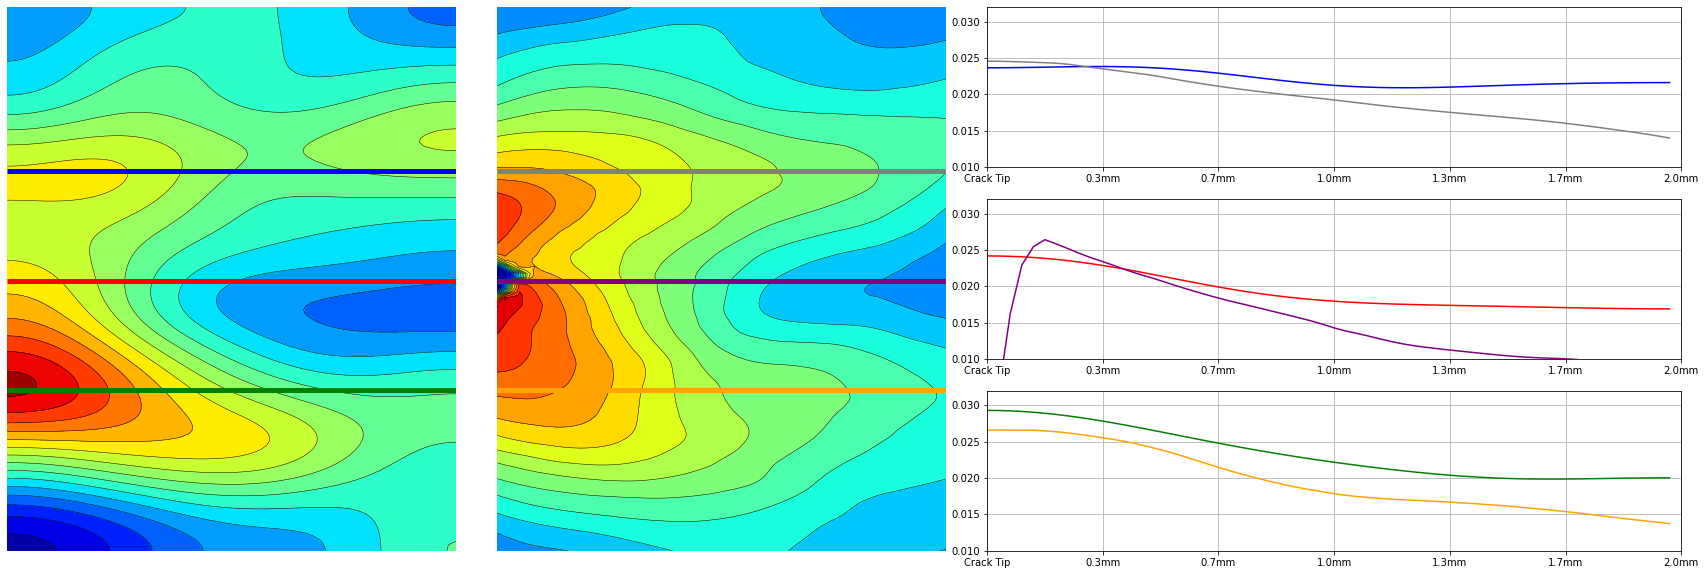

In [117]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
import numpy as np

path = r'E:\experiment data\aluminum\2021-03-30_cts\3_normal'
contour_level=18
plt.rcParams.update({'font.size': 10})
ml_slope=150

with open(path+r'/dic_line.pkl','rb') as f:
    dic_line = pickle.load(f)

with open(path+r'/ml_line.pkl','rb') as f:
    ml_line = pickle.load(f)/ml_slope


fig = plt.figure(figsize=(30, 10))
gs = GridSpec(nrows=3, ncols=6)
ax0 = fig.add_subplot(gs[0:3, 0:2])
csf = ax0.contourf(ml_line/140, contour_level, cmap = 'jet')
CS = ax0.contour(ml_line/140, contour_level, colors='black', linewidths = 0.5)
# ax0.vlines(50,0,np.shape(ee_resize)[0]-1, color='black', linestyles='-.')
plt.gca().invert_yaxis()

ax1 = fig.add_subplot(gs[0:3, 2:4])
csf = ax1.contourf(dic_line, contour_level, cmap = 'jet')
CS = ax1.contour(dic_line, contour_level, colors='black', linewidths = 0.5)
ax1.axis('off')

plt.gca().invert_yaxis()
ax0.axis('off')
plus_minums=30
center = 75

ax0.hlines(center-plus_minums,0,np.shape(ml_line)[1]-1, color='blue',linewidths=5)
ax1.hlines(center-plus_minums,0,np.shape(ml_line)[1]-1, color='gray',linewidths=5)
ax2 = fig.add_subplot(gs[0, 4:6])
ax2.plot(ml_line[center-plus_minums,:], color='blue')
ax2.plot(dic_line[center-plus_minums,:], color='gray')
ax2.set_ylim(0.01,0.032)
ax2.set_xlim(0,len(ml_line[0,:]))
ax2.grid()

ax0.hlines(center,0,np.shape(ml_line)[1]-1, color='red',linewidths=5)
ax1.hlines(center,0,np.shape(ml_line)[1]-1, color='purple',linewidths=5)
ax3 = fig.add_subplot(gs[1, 4:6])
ax3.plot(ml_line[center,:], color='red')
ax3.plot(dic_line[center,:], color='purple')
ax3.set_ylim(0.01,0.032)
ax3.set_xlim(0,len(ml_line[0,:]))
ax3.grid()


ax0.hlines(plus_minums+center,0,np.shape(ml_line)[1]-1, color='green',linewidths=5)
ax1.hlines(plus_minums+center,0,np.shape(ml_line)[1]-1, color='orange',linewidths=5)
ax4 = fig.add_subplot(gs[2, 4:6])
ax4.plot(ml_line[plus_minums+center,:], color='green')
ax4.plot(dic_line[plus_minums+center,:], color='orange')
ax4.set_ylim(0.01,0.032)
ax4.set_xlim(0,len(ml_line[0,:]))
ax4.grid()


labels = [item.get_text() for item in ax2.get_xticklabels()]
labels[0] = 'Crack Tip'
for i in range(1,7):
    labels[i] = str(round(10*i*2/60,1))+'mm'

ax2.set_xticklabels(labels)
ax3.set_xticklabels(labels)
ax4.set_xticklabels(labels)

plt.savefig(path+'/aa.png', dpi= 300,bbox_inches='tight')
plt.show()

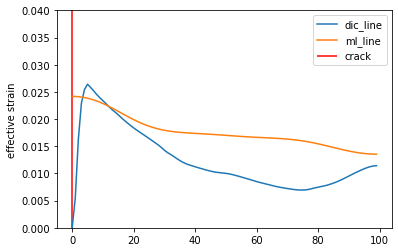

In [88]:
import pickle
import matplotlib.pyplot as plt
save_path = r'E:\experiment data\aluminum\2021-03-30_cts\3_normal'
with open(save_path+r'/dic_line.pkl','rb') as f:
    dic_line = pickle.load(f)

with open(save_path+r'/ml_line.pkl','rb') as f:
    ml_line = pickle.load(f)

plt.plot(dic_line, label='dic_line')
plt.plot(ml_line/150, label='ml_line')
plt.vlines(0,0, 1,colors='red', label='crack')
plt.ylim(0,0.04)
plt.ylabel('effective strain')
plt.legend()

---
# Calculate the Correlation

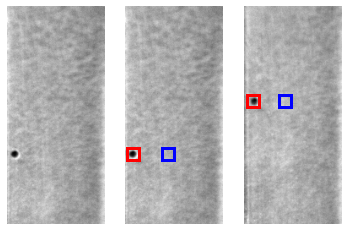

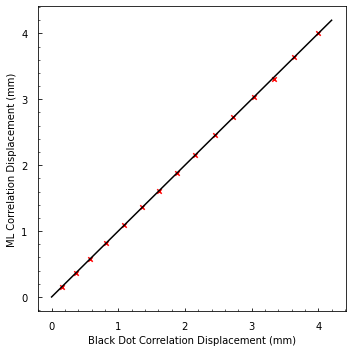

In [131]:
from scipy import signal
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches

reference = cv2.imread('../data/ff00001.jpg',cv2.IMREAD_GRAYSCALE)
deformed = cv2.imread('../data/ff08002.jpg',cv2.IMREAD_GRAYSCALE)


px1, px2 = 48, 164
py1, py2 = 200, 458

fig, ax = plt.subplots(1,3)
ax[0].imshow(reference[py1:py2, px1:px2], cmap='gray')
ax[0].axis('off')

ax[1].imshow(reference[py1:py2, px1:px2], cmap='gray')
ax[1].axis('off')
ax[1].add_patch(
     patches.Rectangle(
        (50-px1, 368-py1),
        14,
        14,
        edgecolor = 'Red',
        facecolor = 'black',
        fill=False, lw=3, ls='-'
     ) )
ax[1].add_patch(
     patches.Rectangle(
        (91-px1, 368-py1),
        14,
        14,
        edgecolor = 'blue',
        facecolor = 'black',
        fill=False, lw=3, ls='-'
     ) )


ax[2].imshow(deformed[py1:py2, px1:px2], cmap='gray')
ax[2].axis('off')
ax[2].add_patch(
     patches.Rectangle(
        (52-px1, 305-py1),
        14,
        14,
        edgecolor = 'Red',
        facecolor = 'black',
        fill=False, lw=3, ls='-'
     ) )
ax[2].add_patch(
     patches.Rectangle(
        (90-px1, 305-py1),
        14,
        14,
        edgecolor = 'blue',
        facecolor = 'black',
        fill=False, lw=3, ls='-'
     ) )

plt.savefig('../data/image.png')

plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(5,5))
deformed_good = np.abs(np.array([381, 374, 367, 359, 350, 341, 333, 324, 315, 305, 296, 286, 276, 266, 254])-386)/33
deformed    =   np.abs(np.array([381, 374, 367, 359, 350, 341, 333, 324, 315, 305, 296, 286, 277, 266, 254])-386)/33

ax.plot([0,deformed_good[-1]+0.2],[0, deformed[-1]+0.2], color='black')
ax.scatter(deformed_good,deformed, color='red', s=20,marker='x')
ax.set_xlabel('Black Dot Correlation Displacement (mm)')
ax.set_ylabel('ML Correlation Displacement (mm)')
ax.tick_params(direction='in', pad=10,which='both')
ax.minorticks_on()
plt.tight_layout()
plt.savefig('../data/relate.png')